In [3]:
import pandas as pd
pd.options.display.max_rows = 20
%matplotlib inline

# Kvaliteta prejetega sadja

V projektni nalogi se ukvarjam z analizo prejetega sadja v hladilnico Evrosad d.o.o. Krško od zunanjih partnerjev v letih 2014 in 2015. Analiza je razdeljena na tri poglavja, in sicer na analizo po kvaliteti sadja (1. kvaliteta ali industrija), po sortah in po dobaviteljih. Primerjam tudi rezultate med letoma 2014 in 2015.

Najprej uvozim tabelo, ki vsebuje naslednje stolpce: datum, dobavitelj, sorta, kvaliteta in količina v kilogramih. V hladilnico sprejemajo predvsem sorte jabolk, sicer pa sprejmejo tudi viljamovko, ki je sorta hruške, in redhaven, ki je sorta breskve. Posamezen dobavitelj torej v hladilnico večkrat na leto pripelje neko količino sadja (jabolk) določene sorte in kvalitete.

In [112]:
kvaliteta = pd.read_csv('podatki.csv', sep=';', parse_dates=['Datum'])

In [113]:
kvaliteta

,Datum,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
0,2014-07-14,Kodrič Milena,Redhaven,I.,820
1,2014-07-15,Kodrič Milena,Redhaven,I.,659
2,2014-07-16,Kodrič Milena,Redhaven,I.,1073
3,2014-07-17,Kodrič Milena,Redhaven,I.,1364
4,2014-07-18,Kodrič Milena,Redhaven,I.,1135
5,2014-07-21,Kodrič Milena,Redhaven,I.,1342
6,2014-07-22,Kodrič Milena,Redhaven,I.,924
7,2014-07-24,Kodrič Milena,Redhaven,I.,1035
8,2014-07-30,Levak Andrej,James Grieve,I.,1453
9,2014-06-08,BIF-VORPO,Viljamovka,I.,21789


# 1 Analiza po kvaliteti sadja

In [114]:
količina_po_letih = kvaliteta.groupby(kvaliteta['Datum'].dt.year).sum()
količina_po_letih = količina_po_letih.rename_axis('Leto')
količina_po_letih

,Količina [kg]
Leto,
2014,3719633
2015,5026230


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002402279F4A8>], dtype=object)

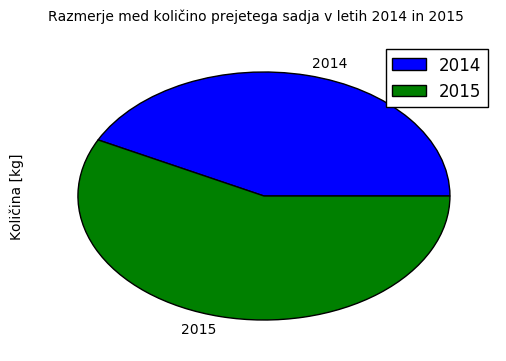

In [115]:
količina_po_letih.plot(kind='pie', subplots=True, title="Razmerje med količino prejetega sadja v letih 2014 in 2015")

Iz grafa je razvidno, da je bilo leta 2015 pripeljanih več jabolk kot leta 2014. Razlog so verjetno naravni pogoji, ki so vplivali na uspešnost pridelave jabolk.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002401F472A58>], dtype=object)

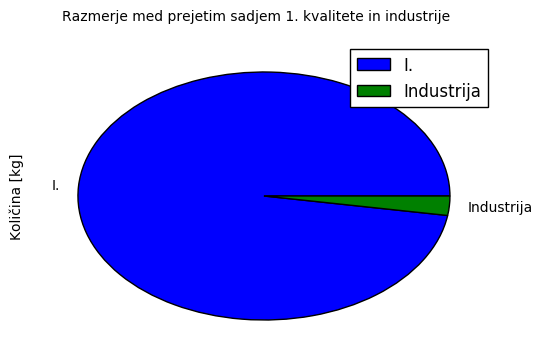

In [13]:
skupna_količina_po_kvaliteti = kvaliteta.groupby('Kvaliteta').sum()
skupna_količina_po_kvaliteti.plot(kind='pie', subplots='True', title="Razmerje med prejetim sadjem 1. kvalitete in industrije")

V hladilnico je bilo pripeljanih veliko več jabolk 1. kvalitete kot pa industrije. Podjetje svojim zunanjim partnerjem namreč za industrijo plačuje izredno nizko ceno, zato jim dovoljuje, da jo prodajo sami.

In [9]:
količina_po_kvaliteti = kvaliteta.groupby([kvaliteta['Datum'].dt.year, kvaliteta['Kvaliteta']]).sum()
količina_po_kvaliteti = količina_po_kvaliteti.rename_axis(['Leto', 'Kvaliteta'])
količina_po_kvaliteti

Količina [kg]
Leto Kvaliteta                
2014 I.                3687052
     Industrija          32581
2015 I.                4839207
     Industrija         187023

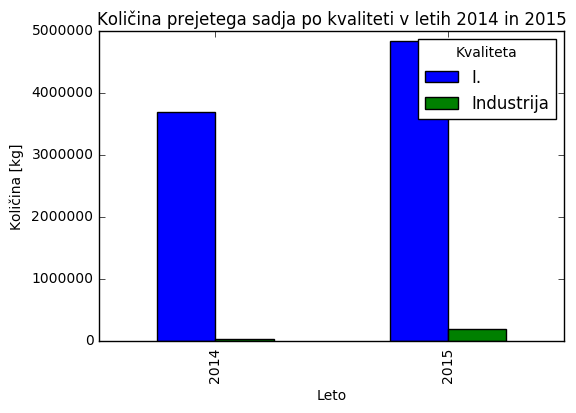

In [15]:
količina_po_kvaliteti.unstack()\
    .plot(kind='bar', y='Količina [kg]', title="Količina prejetega sadja po kvaliteti v letih 2014 in 2015")\
    .set_ylabel("Količina [kg]")

Leto 2015 je bilo na splošno uspešnejše. V hladilnico so zunanji partnerji pripeljali več jabolk 1. kvalitete in industrije, vendar je bilo industrije vseeno zelo malo.

Zanima me, kateri dobavitelj je pripeljal največ industrije.

In [27]:
industrija = kvaliteta[kvaliteta['Kvaliteta'] == 'Industrija']
industrija.groupby('Dobavitelj').sum().sort_values('Količina [kg]', ascending=False)

,Količina [kg]
Dobavitelj,
Levak Andrej,70876
Kunej Ludvik,21534
Umek Jožefa,17307
Umek Jože,17006
Tonjko Stanislav,16713
Molan Mitja,13216
Petan Marija,9724
Kovačič Franc,7509
Metelko Gabrijel,7011


To je bil Levak Andrej. Zanima me še, koliko industrije je pripeljal v posameznem letu.

In [36]:
levak_andrej = kvaliteta[kvaliteta['Dobavitelj'] == 'Levak Andrej'].groupby([kvaliteta['Datum'].dt.year, kvaliteta['Kvaliteta']]).sum()
levak_andrej

Količina [kg]
Datum Kvaliteta                
2014  I.                 510756
2015  I.                 422594
      Industrija          70876

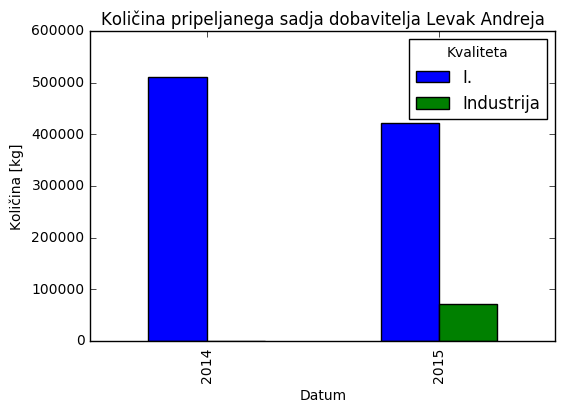

In [117]:
levak_andrej.unstack().plot(kind='bar', y='Količina [kg]', title="Količina pripeljanega sadja dobavitelja Levak Andreja")\
    .set_ylabel("Količina [kg]")

Levak Andrej je izjema glede na prejšnje ugotovitve, saj je skupno več jabolk pripeljal leta 2014. Takrat tudi ni pripeljal nič industrije.

# 2 Analiza po dobaviteljih 

In [69]:
količina_na_dobavitelja = kvaliteta.groupby('Dobavitelj').aggregate(sum).sort_values('Količina [kg]', ascending = False)[:10]

In [70]:
količina_na_dobavitelja

,Količina [kg]
Dobavitelj,
Univerza MB,2058909
VRTOVI VOČA,1020052
Levak Andrej,1004226
Šušterič Vojko,816309
Molan Mitja,476179
Lah Leon,404444
Martini Rene,280355
Mlakar Branko,263371
Novak Ludvik,261215


Največ sadja je pripeljala Univerza MB.

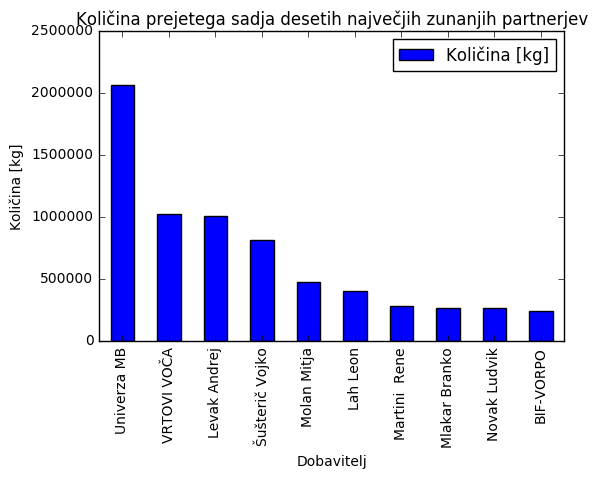

In [72]:
količina_na_dobavitelja\
    .plot(kind='bar', y='Količina [kg]', title="Količina prejetega sadja desetih največjih zunanjih partnerjev")\
    .set_ylabel('Količina [kg]')

In [56]:
količina_na_dobavitelja_index = količina_na_dobavitelja.reset_index()

In [59]:
prva_kvaliteta = kvaliteta[kvaliteta['Kvaliteta'] == 'I.']
dobavitelji_prva = prva_kvaliteta.groupby('Dobavitelj').sum().sort_values('Količina [kg]', ascending = False)[:10]
dobavitelji_prva_index = dobavitelji_prva.reset_index()

In [58]:
pd.merge(količina_na_dobavitelja_index, dobavitelji_prva_index)

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Šušterič Vojko,816309
3,Lah Leon,404444
4,Martini Rene,280355
5,Novak Ludvik,261215
6,BIF-VORPO,241504


Teh sedem dobaviteljev, ki so med desetimi največjimi zunanjimi partnerji, je v dveh letih pripeljalo samo jabolka 1. kvalitete. Sklepam, da večji dobavitelji lažje najdejo trg za jabolka slabše kvalitete kot manjši dobavitelji.

Zdaj bi rada videla količino prejetih jabolk od Univerze MB po posameznih sortah.

In [118]:
univerza_mb = kvaliteta.groupby(['Dobavitelj'])\
    .get_group('Univerza MB').groupby('Sorta').sum().sort_values('Količina [kg]', ascending=False)
univerza_mb

,Količina [kg]
Sorta,
Royal Gala,535815
Zlati Delišes,454787
Evelina,356495
Pinova,165786
Idared,147204
Jonagold,81029
Fuji,79252
Braeburn,65626
Gala,49468


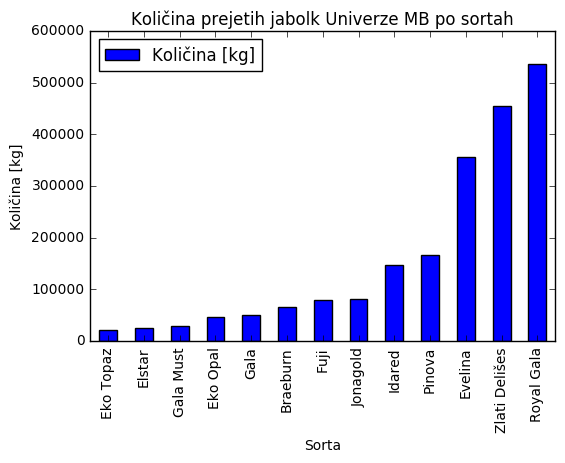

In [78]:
univerza_mb.plot(kind='bar', y='Količina [kg]', title="Količina prejetih jabolk Univerze MB po sortah")\
    .set_ylabel('Količina [kg]')

Zdaj bi rada videla, kdo izmed dobaviteljev ima največji izbor sort.

In [79]:
dobavitelj = kvaliteta.groupby(['Dobavitelj', 'Sorta']).size().unstack()

In [80]:
dobavitelj1 = pd.DataFrame(dobavitelj.isnull().sum(axis=1))
dobavitelj1.columns = ['število']

In [123]:
št_sort = pd.DataFrame(kvaliteta.groupby('Sorta').size().reset_index())
št_sort.shape[0]

21

In [124]:
dobavitelj1['0'] = št_sort.shape[0] - dobavitelj1['število']
dobavitelj2 = pd.DataFrame(dobavitelj1['0'].sort_values())
dobavitelj2.columns = ['število sort na dobavitelja']
dobavitelj2.sort_values('število sort na dobavitelja', ascending=False)

,število sort na dobavitelja
Dobavitelj,
Univerza MB,13
Levak Andrej,11
Lah Leon,9
Kodrič Milena,8
Šušterič Vojko,8
Molan Mitja,6
Žganec Robert,6
VRTOVI VOČA,6
Uplaznik Marjan,5


Vseh različnih pripeljanih sort je 21. Dobavitelj z največjim izborom sort je Univerza MB, in sicer je pripeljala 13 različnih sort.

# 3 Analiza po sortah

In [89]:
količina_po_sortah = kvaliteta.groupby(['Sorta']).aggregate(sum).sort_values('Količina [kg]', ascending=False)[:10]\
    .reset_index()
količina_po_sortah

,Sorta,Količina [kg]
0,Zlati Delišes,1961001
1,Royal Gala,1859515
2,Idared,1036789
3,Evelina,908451
4,Braeburn,867193
5,Granny Smith,508345
6,Jonagold,405566
7,Pinova,251666
8,Fuji,248083
9,Viljamovka,201687


To je 10 količinsko najbolj zastopanih sort, ki jih bom analizirala po letih.

In [97]:
top_sorte = pd.DataFrame(količina_po_sortah['Sorta'])
top_sorte
tabela_le_top_sorte = pd.merge(kvaliteta, top_sorte)
tabela_top_sort = tabela_le_top_sorte.set_index('Datum')

In [98]:
tabela_top_sort.loc[:, 'Leto'] = tabela_top_sort.index.year
tabela_top_sort

,Dobavitelj,Sorta,Kvaliteta,Količina [kg],Leto
Datum,,,,,
2014-06-08,BIF-VORPO,Viljamovka,I.,21789,2014
2014-08-08,Umek Jožefa,Viljamovka,Industrija,7680,2014
2014-08-08,BIF-VORPO,Viljamovka,I.,18540,2014
2014-08-08,BIF-VORPO,Viljamovka,I.,4099,2014
2014-11-08,Umek Jožefa,Viljamovka,Industrija,9627,2014
2014-11-08,BIF-VORPO,Viljamovka,I.,21457,2014
2014-08-13,Pinterič Antonija,Viljamovka,Industrija,2035,2014
2014-08-13,BIF-VORPO,Viljamovka,I.,15947,2014
2014-08-14,Kovačič Alojz,Viljamovka,Industrija,2005,2014


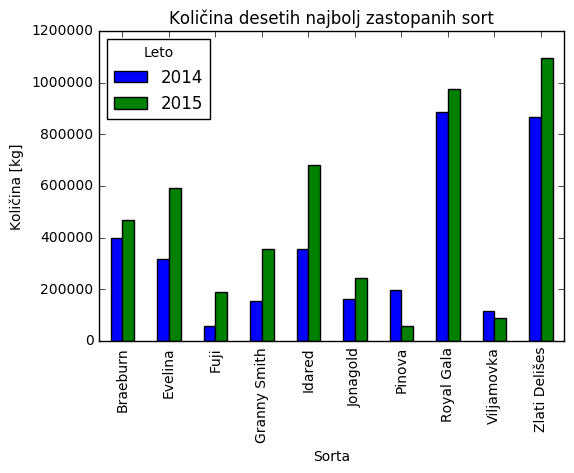

In [100]:
tabela_top_sort.groupby(['Sorta', 'Leto'])\
    .sum().unstack().plot(kind='bar', y ='Količina [kg]', title="Količina desetih najbolj zastopanih sort")\
    .set_ylabel('Količina [kg]')

In [101]:
sorte = kvaliteta.groupby(['Sorta', 'Dobavitelj']).size().unstack()

In [102]:
sorte1 = pd.DataFrame(sorte.isnull().sum(axis=1))
sorte1.columns = ['število']

In [125]:
št_dobaviteljev = pd.DataFrame(kvaliteta.groupby('Dobavitelj').size().reset_index()) #Da bom vedela število dobaviteljev.
št_dobaviteljev.shape[0]

50

In [126]:
sorte1['0'] = št_dobaviteljev.shape[0] - sorte1['število']
sorte2 = pd.DataFrame(sorte1['0'].sort_values())
sorte2.columns = ['število dobaviteljev na sorto']
sorte3 = sorte2.sort_values('število dobaviteljev na sorto', ascending=False)
sorte4 = sorte3.reset_index()[:10]
sorte4

,Sorta,število dobaviteljev na sorto
0,Zlati Delišes,20
1,Royal Gala,20
2,Idared,19
3,Jonagold,17
4,Braeburn,10
5,Viljamovka,9
6,Fuji,7
7,Granny Smith,7
8,Gala,6
9,Gala Must,6


Največ dobaviteljev v hladilnico pripelje sorte Zlati Delišes, Royal Gala, Idared, Jonagold ...

In [111]:
pd.merge(količina_po_sortah, sorte4)

,Sorta,Količina [kg],število dobaviteljev na sorto
0,Zlati Delišes,1961001,20
1,Royal Gala,1859515,20
2,Idared,1036789,19
3,Braeburn,867193,10
4,Granny Smith,508345,7
5,Jonagold,405566,17
6,Fuji,248083,7
7,Viljamovka,201687,9


Iz združene tabele vidim, da je 8 od 10-ih sort takih, za katere velja, da so med desetimi količinsko najbolj zastopanimi sortami in hkrati so med desetimi sortami, ki jih pripelje največ dobaviteljev.